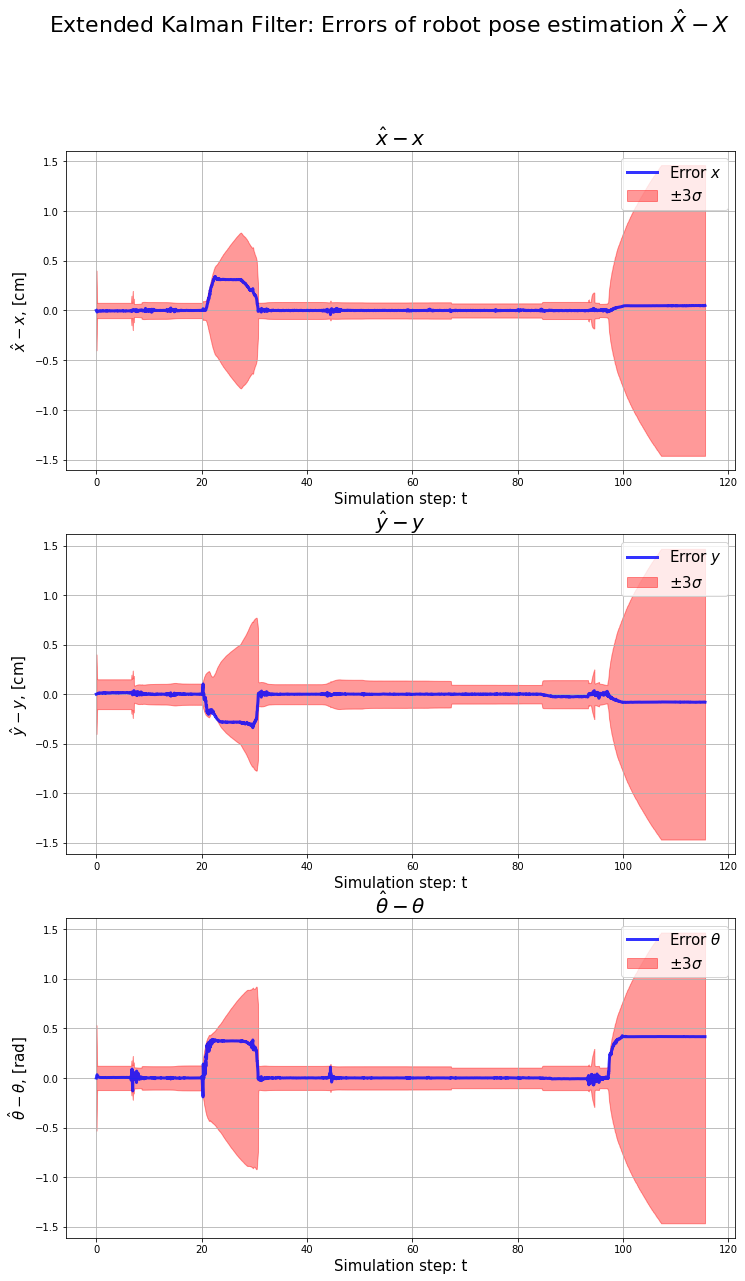

In [121]:
import numpy as np
import matplotlib.pyplot as plt
from task import wrap_angle
labelsize = 15      # Label font size
titlesize = 20      # Title font size
suptitlesize = 22   # Suptitle font size
import rosbag
from geometry_msgs.msg import PoseWithCovarianceStamped
from tf.transformations import euler_from_quaternion

# Import EKF data
ekf = np.load('/home/aleksandr/Eurobot/eurobot_ws/src/eurobot_localization/scripts/Graphs/ekf.npy')

# Import PF Data
pf = np.load('/home/aleksandr/Eurobot/eurobot_ws/src/eurobot_localization/scripts/Graphs/pf.npy')

# Import ground truth data
gt = np.load('/home/aleksandr/Eurobot/eurobot_ws/src/eurobot_localization/scripts/Graphs/pf_gt.npy')

def data_ass(a, b):
    list_ind_a = list()
    list_ind_b = list()
    for i in range(len(a)):
        for j in range(i, len(b)):
            if a[i] == b[j]:
                list_ind_a.append(i)
                list_ind_b.append(j)
            continue
    return np.array(list_ind_a), np.array(list_ind_b)

list_ind_ekf, list_ind_gt = data_ass(ekf[:, 0], gt[:, 0])

def plot_results(real, estim, title):
    ''' Function plots results for tasks C and D
    '''
    # Assign data
    # X mean
    X_hat = estim[:, 1] # Estimated pose X
    X = real[:, 1]      # Real robot position X
    # X std
    X_std = 3*estim[:, 4]

    # Y mean
    Y_hat = estim[:, 2] # Estimated pose Y
    Y = real[:, 2]       # Real robot position Y
    # Y std
    Y_std = 3*estim[:, 5]

    # Theta
    Theta_hat = estim[:, 3] # Estimated pose Theta
    Theta = real[:, 3]      # Real robot position Theta
    diff_Theta = np.array([wrap_angle(Theta_hat[i]-Theta[i]) for i in range(len(Theta))])
    # Theta std
    Theta_std = 3*estim[:, 6]

    t = real[:, 0] - real[0, 0]

    plt.figure(figsize=[12,20], facecolor='white')
    plt.suptitle(title, fontsize=suptitlesize)

    #X
    plt.subplot(3, 1, 1)
    plt.plot(t, X_hat-X, linewidth=3, color='blue', label='Error $x$', alpha=0.8) # X Mean
    plt.fill_between(t, 3*X_std, -3*X_std, color='red', alpha=0.4, label=r'$\pm 3\sigma$')
    plt.title(r'$\hat{x}-x$', fontsize=titlesize)
    plt.legend(loc='upper right', fontsize=labelsize)
    plt.grid(True)
    plt.xlabel('Simulation step: t', fontsize=labelsize)
    plt.ylabel(r'$\hat{x}-x$, [cm]', fontsize=labelsize)

    #Y
    plt.subplot(3, 1, 2)
    plt.plot(t, Y_hat-Y, linewidth=3, color='blue', label='Error $y$', alpha=0.8) # Y Mean
    plt.fill_between(t, 3*Y_std, -3*Y_std, color='red', alpha=0.4, label=r'$\pm 3\sigma$')
    plt.title(r'$\hat{y}-y$', fontsize=titlesize)
    plt.legend(loc='upper right', fontsize=labelsize)
    plt.grid(True)
    plt.xlabel('Simulation step: t', fontsize=labelsize)
    plt.ylabel(r'$\hat{y}-y$, [cm]', fontsize=labelsize)

    #Theta
    plt.subplot(3, 1, 3)
    plt.plot(t, diff_Theta, linewidth=3, color='blue', label=r'Error $\theta$', alpha=0.8) # Theta Mean
    plt.fill_between(t, 3*Theta_std, -3*Theta_std, color='red', alpha=0.4, label=r'$\pm 3\sigma$')
    plt.title(r'$\hat{\theta}-\theta$', fontsize=titlesize)
    plt.legend(loc='upper right', fontsize=labelsize)
    plt.grid(True)
    plt.xlabel('Simulation step: t', fontsize=labelsize)
    plt.ylabel(r'$\hat{\theta}-\theta$, [rad]', fontsize=labelsize)
    plt.show()

    # Define title
ekf_title = r'Extended Kalman Filter: Errors of robot pose estimation $\hat{X} - X$'

plot_results(gt[list_ind_gt, :], ekf[list_ind_ekf, :], ekf_title)

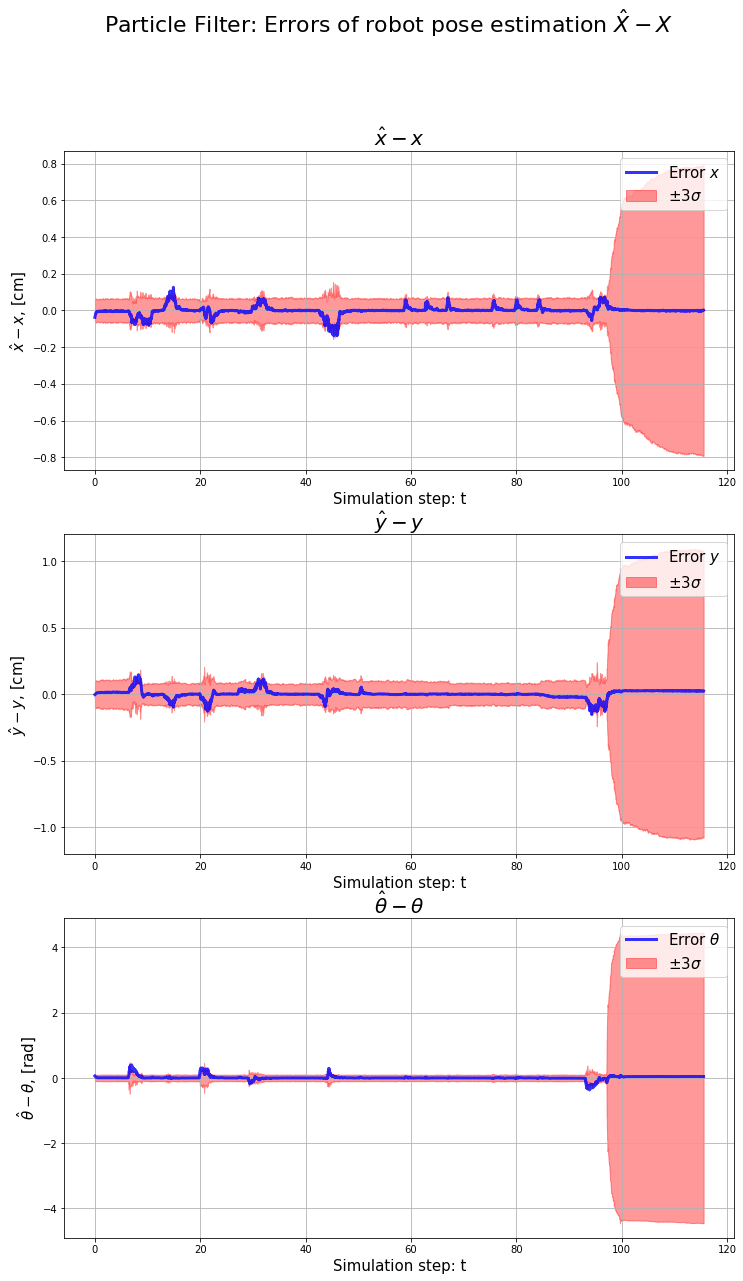

In [125]:
list_int_pf = []
for time in gt[:, 0]:
    i = np.argmin(abs((pf[:,0] - pf[0,0]) - time))
    list_int_pf.append(i)
list_ind_pf = np.array(list_int_pf)

   # Define title
pf_title = r'Particle Filter: Errors of robot pose estimation $\hat{X} - X$'

plot_results(gt, pf[list_ind_pf, :], pf_title)

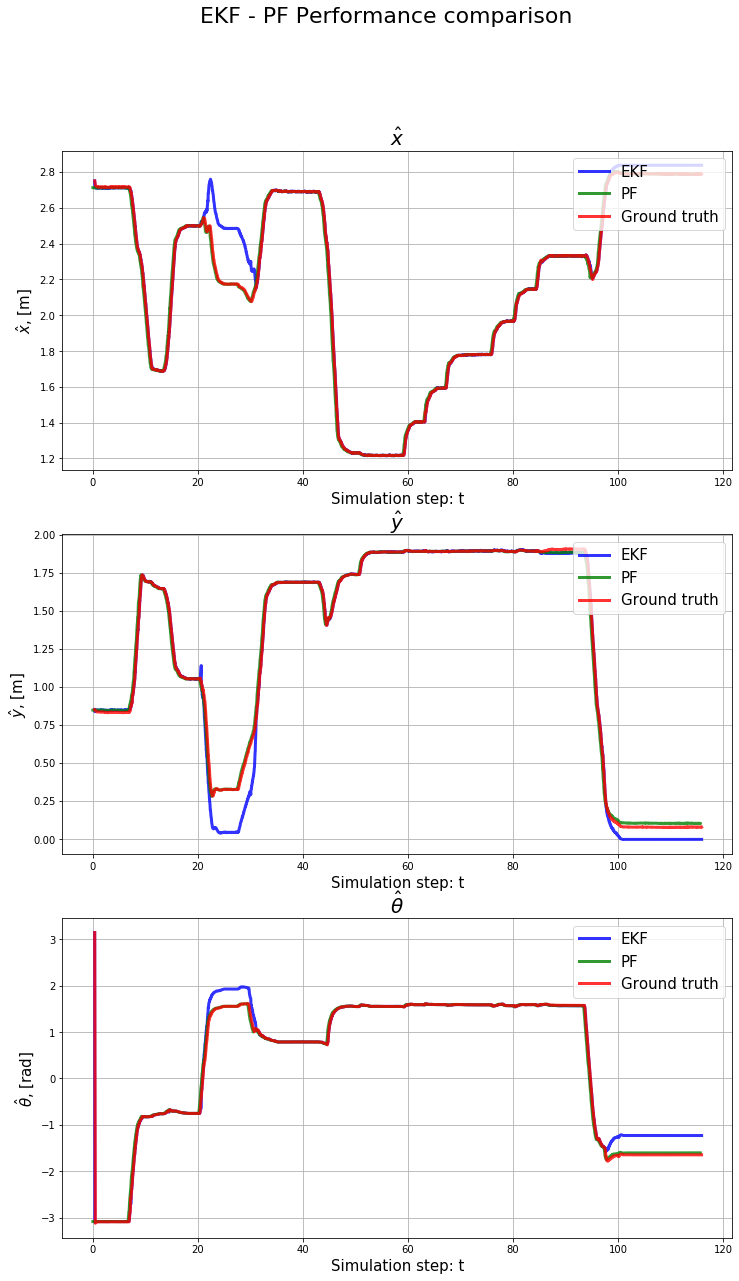

In [130]:
plt.figure(figsize=[12,20], facecolor='white')
plt.suptitle('EKF - PF Performance comparison', fontsize=suptitlesize)

#X
plt.subplot(3, 1, 1)
plt.plot(ekf[:, 0], ekf[:, 1], linewidth=3, color='blue', label='EKF', alpha=0.8) # X Mean
plt.plot(pf[:, 0] - pf[0, 0], pf[:, 1], linewidth=3, color='green', label='PF', alpha=0.8)
plt.plot(gt[:, 0], gt[:, 1], linewidth=3, color='red', label='Ground truth', alpha=0.8) # X Mean
#plt.fill_between(t, 3*X_std, -3*X_std, color='red', alpha=0.4, label=r'$\pm 3\sigma$')
plt.title(r'$\hat{x}$', fontsize=titlesize)
plt.legend(loc='upper right', fontsize=labelsize)
plt.grid(True)
plt.xlabel('Simulation step: t', fontsize=labelsize)
plt.ylabel(r'$\hat{x}$, [m]', fontsize=labelsize)

#Y
plt.subplot(3, 1, 2)
plt.plot(ekf[:, 0], ekf[:, 2], linewidth=3, color='blue', label='EKF', alpha=0.8) # Y Mean
plt.plot(pf[:, 0] - pf[0, 0], pf[:, 2], linewidth=3, color='green', label='PF', alpha=0.8)
plt.plot(gt[:, 0], gt[:, 2], linewidth=3, color='r', label='Ground truth', alpha=0.8)
#plt.fill_between(t, 3*Y_std, -3*Y_std, color='red', alpha=0.4, label=r'$\pm 3\sigma$')
plt.title(r'$\hat{y}$', fontsize=titlesize)
plt.legend(loc='upper right', fontsize=labelsize)
plt.grid(True)
plt.xlabel('Simulation step: t', fontsize=labelsize)
plt.ylabel(r'$\hat{y}$, [m]', fontsize=labelsize)

plt.subplot(3, 1, 3)
plt.plot(ekf[:, 0], ekf[:, 3], linewidth=3, color='blue', label=r'EKF', alpha=0.8) # Theta Mean
plt.plot(pf[:, 0] - pf[0, 0], pf[:, 3], linewidth=3, color='green', label=r'PF', alpha=0.8) # Theta Mean
plt.plot(gt[:, 0], gt[:, 3], linewidth=3, color='r', label='Ground truth', alpha=0.8)
#plt.fill_between(t, 3*Theta_std, -3*Theta_std, color='red', alpha=0.4, label=r'$\pm 3\sigma$')
plt.title(r'$\hat{\theta}$', fontsize=titlesize)
plt.legend(loc='upper right', fontsize=labelsize)
plt.grid(True)
plt.xlabel('Simulation step: t', fontsize=labelsize)
plt.ylabel(r'$\hat{\theta}$, [rad]', fontsize=labelsize)
plt.show()